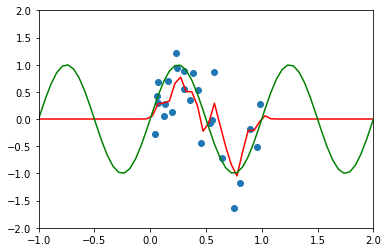

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

M = 24
mu = np.linspace(0, 1, M)

def h(X):    
    return np.sin(2 * np.pi * X)

def phi(x, mu):
    if(mu == 0):
        return 1
    else:
        return np.exp(-1000/2 * (x-mu)**2)

def generate_dataset(size):
    X = np.random.uniform(size=size)
    T = np.sin(2 * np.pi * X) + 0.5 * np.random.normal(size = size)
    return (X,T)

def generate_datasets(count, size):
    return [generate_dataset(size) for i in range(count)]

def calculate_design_matrix(X):
    Phi = np.zeros((len(X),M))
    for i in range(len(X)):
        for j in range(M):
            Phi[i,j] = phi(X[i], mu[j])
    return Phi

def fit_model(X, T, lam):
    Phi = calculate_design_matrix(X)
    inv = np.linalg.inv(lam * np.identity(M) + Phi.T.dot(Phi))
    W_opt = inv.dot(Phi.T).dot(T)
    return W_opt

def predict(x, W):
    sum = 0
    for i in range(M):
        sum += W[i] * phi(x, mu[i])
    return sum

def predict_all(X, W):
    return np.array([predict(x, W) for x in X])

def plot_models(n, Ws):
    for i in range(n):
        plt.plot(Z, predict_all(Z, Ws[i]), color = 'red')

def mean(Ws):
    return np.transpose(Ws).mean(axis = 1)    
        
def plot_mean(Ws):
    plt.plot(Z, predict_all(Z, mean(Ws)), color = 'blue')
    
def plot_truth():
    Y = h(Z)
    plt.plot(Z, Y, color = 'green')
    
def bias(W):
    #with np.abs the resulting bias seemed more reasonable to me
    return np.mean(np.abs(predict_all(Z, W) - h(Z)))

def variance(W):
    return np.mean((predict_all(Z, W) - np.mean(predict_all(Z, W)))**2)

def noise(D):
    return np.mean([np.mean(np.abs(h(X) - T)) for X,T in D])

#def regression(lam):
lam=1
L = 100
N = 25
Z = np.linspace(-2, 3, 100)
X,T = generate_dataset(N)
plt.xlim([-1,2])
plt.ylim([-2,2])
plt.scatter(X,T)
W = fit_model(X,T, lam) 
plt.plot(Z, predict_all(Z, W), color = 'red')
#plot_mean(Ws)
plot_truth()
#    return (bias(mean(Ws)), variance(mean(Ws)), noise(D),
#            bias(mean(Ws))**2 + variance(mean(Ws)) + noise(D))
    

#lambdas = [0.01, 0.3, 1, 10]

#plt.figure(figsize=(14,4*len(lambdas)/2))
#B = np.array([], dtype = np.dtype('f8'))
#V = np.array([], dtype = np.dtype('f8'))
#EL = np.array([], dtype = np.dtype('f8'))

#for i in range(len(lambdas)):
#    plt.subplot(len(lambdas)/2, 2, i+1)
#    plt.xlabel("x")
#    plt.ylabel("t")
#    plt.xlim([0,1])
#    plt.ylim([-2,2])
#    b,v,n,el = regression(lambdas[i])
#    B = np.append(B, b)
#    V = np.append(V, v)
#    EL = np.append(EL, el)
#    result_text = "${\lambda}$" + (" = {0}, "
#    "bias = {1}, "
#    "var = {2}, "
#    "noise = {3}, "
#    "exp. loss = {4}").format(np.round(lambdas[i],3),
#                 np.round(b,3),
#                 np.round(v,3),
#                 np.round(n,3),
#                 np.round(el,3))
#    plt.text(0.02, 2.1, result_text)
    
#plt.figure(figsize=(14,10)) 
#
#plt.plot(lambdas, B, label = "bias")
#plt.plot(lambdas, V, label = "variance")
#plt.plot(lambdas, EL, label = "expected loss")
#plt.legend()

plt.show()